In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output("ls ../input", shell = True).decode("utf8"))

# Any results you write to the current directory are saved as output.

holidays_events.csv
items.csv
oil.csv
sample_submission.csv
stores.csv
test.csv
test_sample.csv
train.csv
train_sample.csv
transactions.csv



In [2]:
# load in the training data
loadAll = True
train_df = pd.read_csv('../input/train.csv', header = 0, index_col = 'id', 
                       parse_dates = ['date'], dtype = {'onpromotion': bool}, nrows = None if loadAll else 1000000)

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python2.7/dist-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
# Take a look at the first few rows
train_df.head(5)

,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
0,2013-01-01,25,103665,7.0,NaN
1,2013-01-01,25,105574,1.0,NaN
2,2013-01-01,25,105575,2.0,NaN
3,2013-01-01,25,108079,1.0,NaN
4,2013-01-01,25,108701,1.0,NaN


In [4]:
# get the number of training examples
len(train_df)

125497040

In [5]:
# get some basic summary stats for the number of sales
train_df['unit_sales'].describe()

count    1.254970e+08
mean     8.554865e+00
std      2.360515e+01
min     -1.537200e+04
25%      2.000000e+00
50%      4.000000e+00
75%      9.000000e+00
max      8.944000e+04
Name: unit_sales, dtype: float64

In [6]:
# we're told a negative unit_sales means items were returned.  Check how often that occurs
len(train_df[train_df.unit_sales < 0])

7795

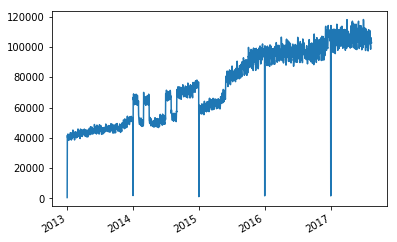

In [7]:
# get the number of buy events by date
train_df['date'].value_counts().plot()

In [8]:
#The number of buy events at different stores
train_df['store_nbr'].value_counts()

44    3513089
45    3484244
47    3457407
3     3401264
46    3353890
49    3342531
8     3261184
48    3236523
50    3192566
6     3089799
2     2987840
51    2960031
7     2921204
37    2831691
4     2830554
9     2773790
24    2769889
38    2727731
5     2666691
39    2638036
27    2631714
11    2568282
1     2562153
41    2503919
28    2418816
23    2365697
31    2361724
34    2299422
36    2211162
18    2196682
17    2164020
40    2102799
25    2057020
33    1963485
43    1939694
15    1938678
53    1938255
19    1879155
12    1836583
16    1820035
14    1805941
26    1793082
10    1740482
13    1736728
20    1665985
54    1648867
30    1597862
29    1508959
42    1461683
35    1388104
21    1373419
32    1362615
22     923483
52     290581
Name: store_nbr, dtype: int64

In [9]:
#The number of buy events at different stores
train_df['item_nbr'].value_counts()

502331     83475
314384     83450
364606     83308
265559     83047
559870     82513
1036689    82134
273528     82108
564533     82086
261052     81774
414353     81755
1084881    81324
839363     81268
850333     81097
414750     81091
847863     80947
581078     80776
1047679    80713
258396     80574
759893     80499
841842     80419
215331     80119
265279     80048
1052563    79937
807493     79885
1047685    79832
567623     79783
1047790    79680
165594     79648
564534     79625
1047681    79603
           ...  
2120723       28
1976284       25
2114752       25
2123036       23
2123791       21
2121690       19
2011457       18
2011470       17
2011437       16
2121610       13
2123839       13
2123711       12
2126842       12
2123863       12
2116139       12
2123859       10
2116132       10
2011448       10
2011459        9
2011468        9
2123790        8
2116238        7
2126944        5
2122947        5
2123209        5
2123463        5
2123747        3
2122818       

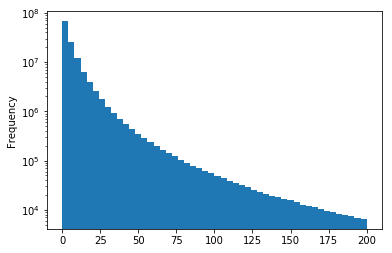

In [10]:
# distribution of the number of items being bought
pos_sales = train_df.unit_sales >= 0
small_sales = train_df.unit_sales <= 200
train_df.unit_sales[pos_sales & small_sales].plot.hist(bins = 50, log=True)

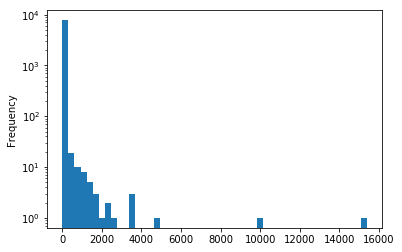

In [12]:
# distribution of the number of items being returned
train_df[train_df.unit_sales < 0].unit_sales.apply(lambda x: -x).plot.hist(bins = 50, log = True)